# Set dimensions

In [3]:
sns.set(rc = {'figure.figsize':(12,8)})


# Open the dataset 

In [4]:
table = pd.read_csv('/Users/marcovinciguerra/Github/GitTesi/Python/NNdata.csv')
table.head()

Date  IDStation                   NameStation  Ammonia  \
0  2018-01-01T00:00:00Z        677  Cremona Via Fatebenefratelli      6.2   
1  2018-01-01T00:00:00Z        681                        Moggio      1.4   
2  2018-01-01T00:00:00Z        703                  Schivenoglia      NaN   
3  2018-01-02T00:00:00Z        677  Cremona Via Fatebenefratelli      1.8   
4  2018-01-02T00:00:00Z        681                        Moggio      1.0   

   Arsenic  Benzene  Benzo_a_pyrene  Cadmium        CO  Lead  ...  \
0      NaN      NaN             NaN      NaN  0.508333   NaN  ...   
1      NaN      NaN             NaN      NaN       NaN   NaN  ...   
2      NaN      1.0             NaN      NaN  1.159091   NaN  ...   
3      NaN      NaN             NaN      NaN  0.375000   NaN  ...   
4      NaN      NaN             NaN      NaN       NaN   NaN  ...   

   IDStation.2                 NameStation.1  Wind_speed  Wind_direction  \
0          677  Cremona Via Fatebenefratelli    0.483454           314.0   
1          111     Cassina Valsassina Moggio    0.300970            65.0   
2          671             Mantova Tridolino    1.540787           288.0   
3          677  Cremona Via Fatebenefratelli    1.788399           284.0   
4          111     Cassina Valsassina Moggio    0.613183             9.0   

   Temperature  Relative_humidity  Global_radiation  Wind_speed_max  \
0     2.615278          93.738194         21.268056        2.133333   
1     2.095833          74.055556         60.152778        1.939583   
2     2.761806          99.475694         14.163194        3.524306   
3     5.974306          70.609722         72.734028        4.377083   
4     1.670139          39.194444         68.250000        3.075000   

   Wind_direction_max  Rainfall  
0                 NaN       7.2  
1               144.0       2.4  
2                 NaN       5.8  
3                 NaN       0.0  
4               213.0       0.0  

[5 rows x 31 columns]

# Scatterplot di tutte le centraline

In [4]:

# altair can only use up to 5000 rows
table2 = table.loc[500:np.shape(table)[0], :]

table2 = table2.loc[table2["Ammonia"] < 150]

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
    x='PM10',
    y='Ammonia',
    color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
    selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
    x='count()',
    y='NameStation',
    color='NameStation'
).transform_filter(interval)

points & histogram


alt.VConcatChart(...)

# Plot di Cremona via Fatebenfratelli

# Plot of the time series


In [5]:
tablea = table.loc[table.NameStation == "Cremona Via Fatebenefratelli", :]
tablea.head()


Date  IDStation                   NameStation  Ammonia  \
0   2018-01-01T00:00:00Z        677  Cremona Via Fatebenefratelli      6.2   
3   2018-01-02T00:00:00Z        677  Cremona Via Fatebenefratelli      1.8   
6   2018-01-03T00:00:00Z        677  Cremona Via Fatebenefratelli      2.7   
9   2018-01-04T00:00:00Z        677  Cremona Via Fatebenefratelli      3.8   
12  2018-01-05T00:00:00Z        677  Cremona Via Fatebenefratelli      7.5   

    Arsenic  Benzene  Benzo_a_pyrene  Cadmium        CO  Lead  ...  \
0       NaN      NaN             NaN      NaN  0.508333   NaN  ...   
3       NaN      NaN             NaN      NaN  0.375000   NaN  ...   
6       NaN      NaN             NaN      NaN  0.554167   NaN  ...   
9       NaN      NaN             NaN      NaN  0.529167   NaN  ...   
12      NaN      NaN             NaN      NaN  0.675000   NaN  ...   

    IDStation.2                 NameStation.1  Wind_speed  Wind_direction  \
0           677  Cremona Via Fatebenefratelli    0.483454           314.0   
3           677  Cremona Via Fatebenefratelli    1.788399           284.0   
6           677  Cremona Via Fatebenefratelli    0.244546           345.0   
9           677  Cremona Via Fatebenefratelli    0.297649             7.0   
12          677  Cremona Via Fatebenefratelli    0.150277           359.0   

    Temperature  Relative_humidity  Global_radiation  Wind_speed_max  \
0      2.615278          93.738194         21.268056        2.133333   
3      5.974306          70.609722         72.734028        4.377083   
6      3.490972          77.761806         54.204861        2.040278   
9      5.206250          77.161806         67.627778        2.166667   
12     4.120833          90.489583         16.597917        1.223611   

    Wind_direction_max  Rainfall  
0                  NaN       7.2  
3                  NaN       0.0  
6                  NaN       0.4  
9                  NaN       0.0  
12                 NaN       0.0  

[5 rows x 31 columns]

<AxesSubplot:xlabel='Date', ylabel='Ammonia'>

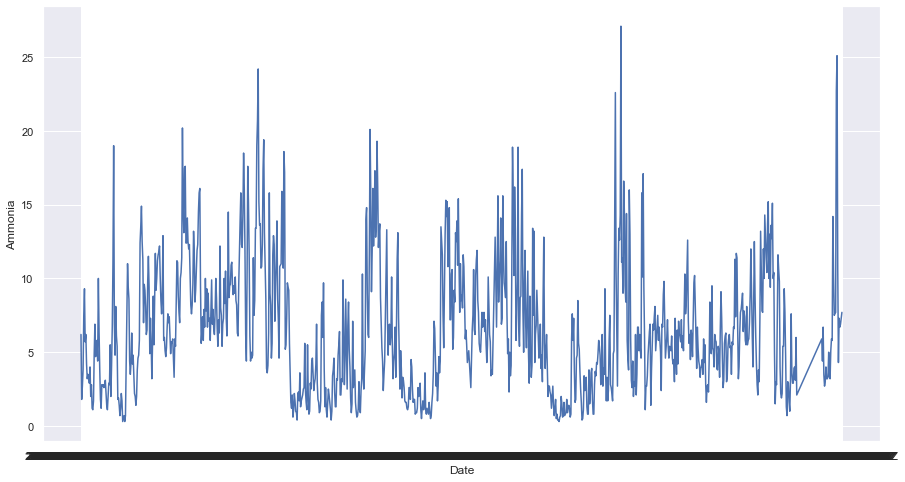

In [7]:
tableGraph = table.loc[table.NameStation == "Cremona Via Fatebenefratelli", :]
sns.lineplot(x="Date", y="Ammonia", data=tableGraph)

<AxesSubplot:xlabel='Date', ylabel='PM10'>

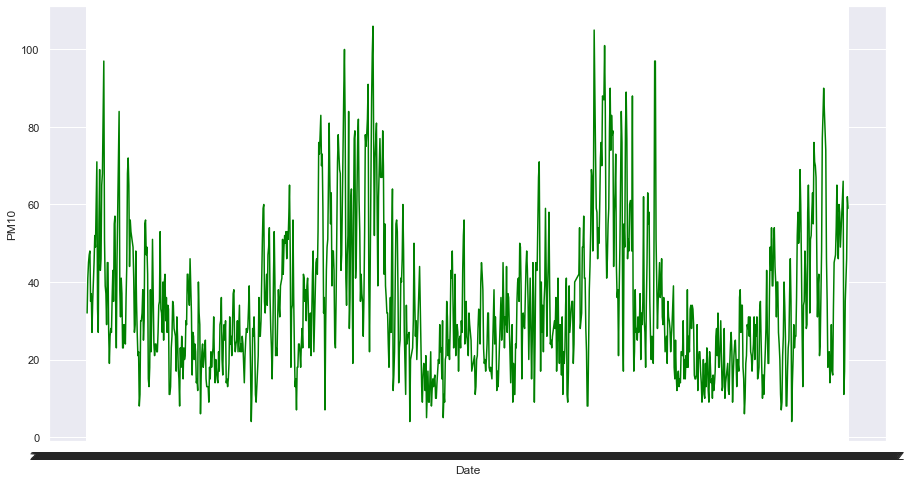

In [8]:
sns.lineplot(x="Date", y="PM10", data=tableGraph, color="green")

/opt/homebrew/Caskroom/miniforge/base/envs/vincienv/lib/python3.9/site-packages/seaborn/relational.py:436: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = ax.plot([], [], **kws)
/opt/homebrew/Caskroom/miniforge/base/envs/vincienv/lib/python3.9/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot([], [], **kws)
/opt/homebrew/Caskroom/miniforge/base/envs/vincienv/lib/python3.9/site-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kws)


<AxesSubplot:xlabel='Date', ylabel='PM25'>

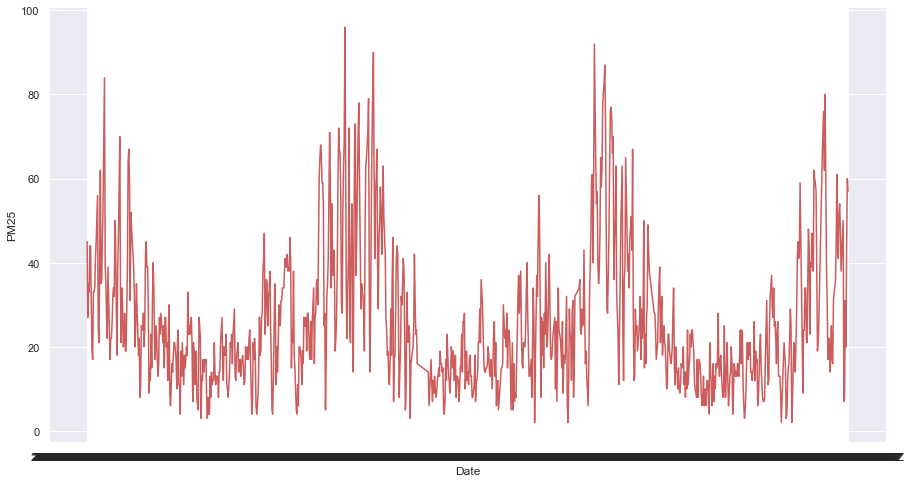

In [9]:
sns.lineplot(x="Date", y="PM25", data=tableGraph, Color="indianred")

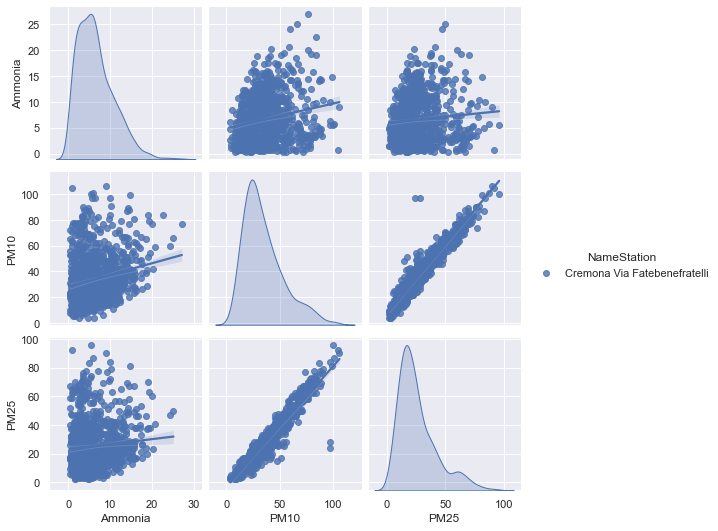

In [10]:
sns.pairplot(table.loc[table.NameStation == "Cremona Via Fatebenefratelli", ["NameStation", "Ammonia",
             "PM10", "PM25"]], hue="NameStation", kind="reg")


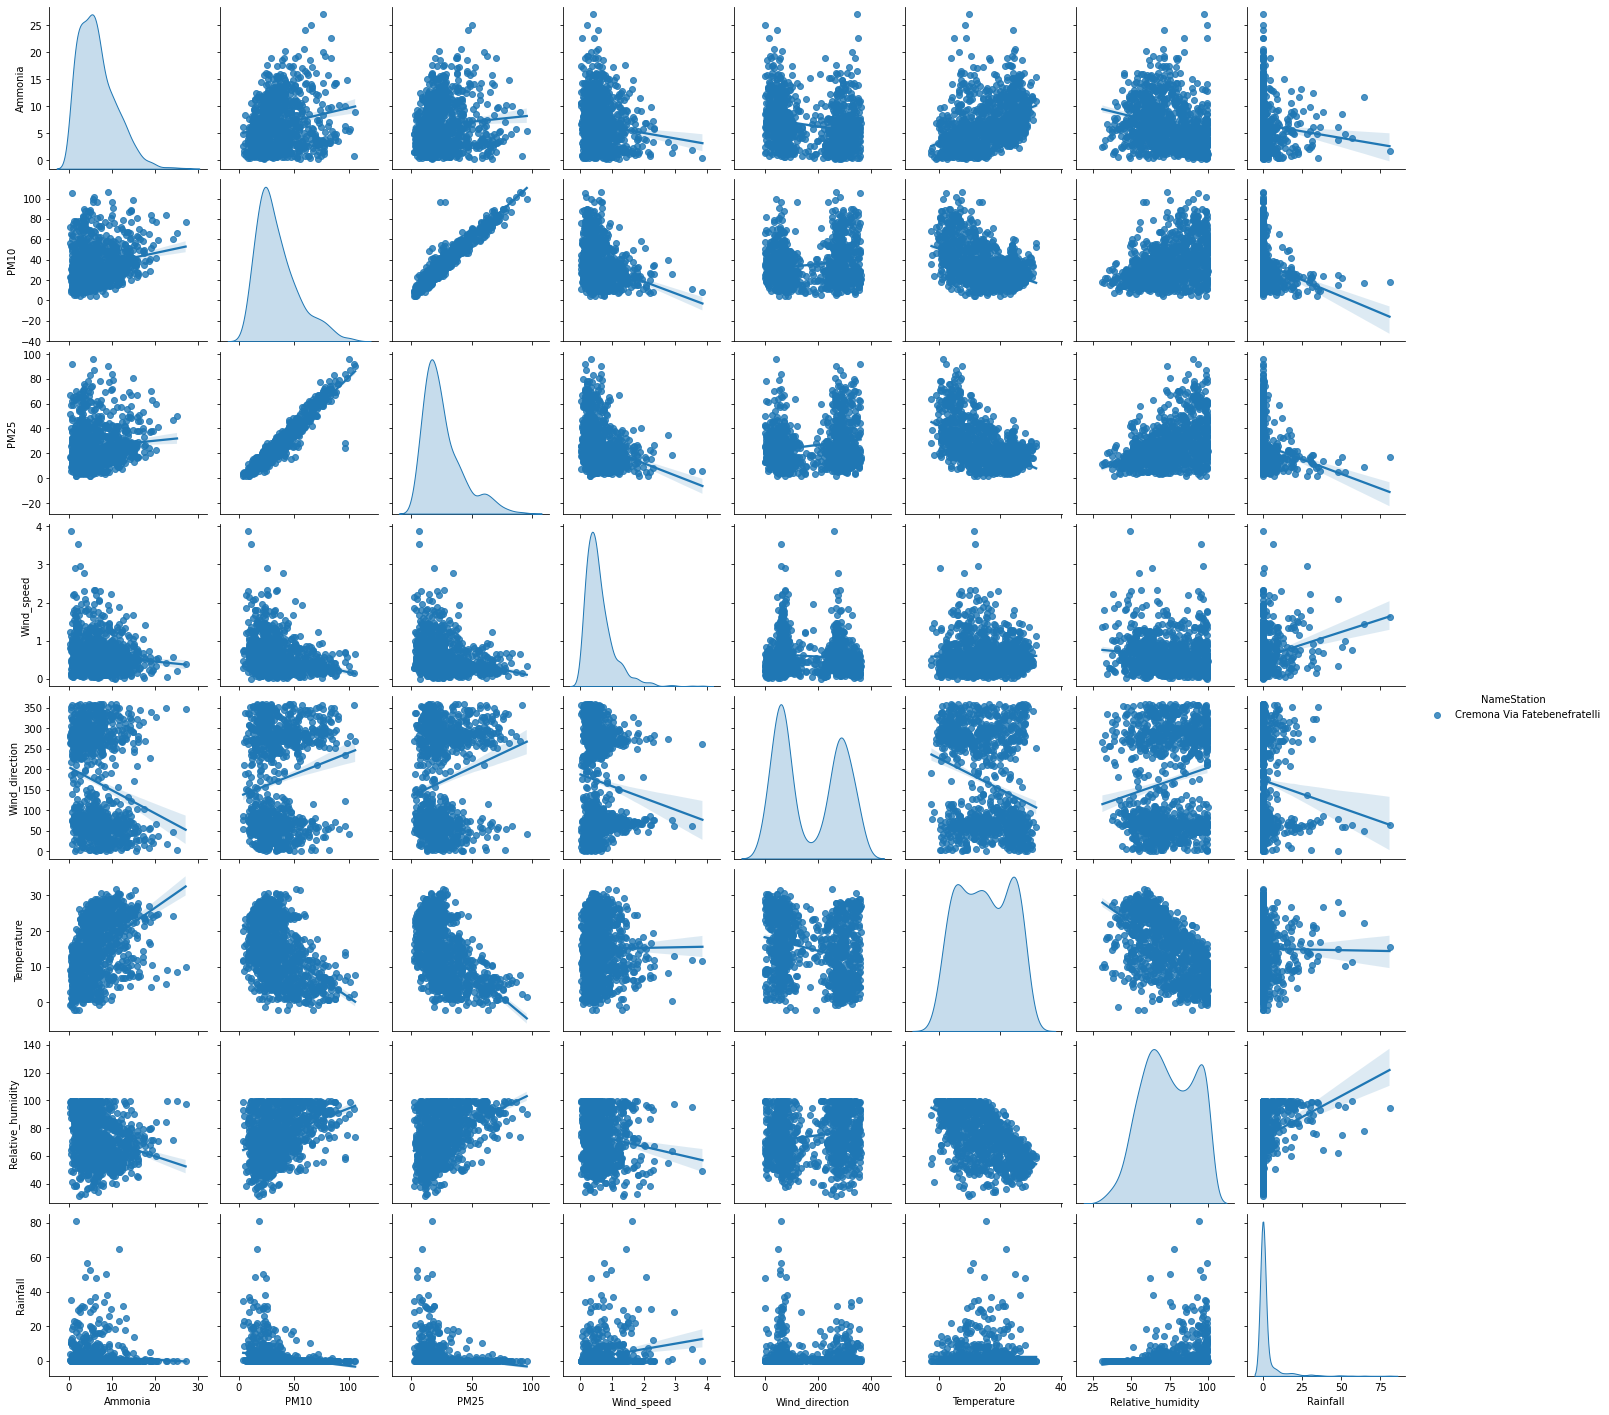

In [7]:
sns.pairplot(table.loc[table.NameStation == "Cremona Via Fatebenefratelli", ['NameStation', 'Ammonia', 'PM10',
             'PM25', 'Wind_speed', 'Wind_direction', 'Temperature', 'Relative_humidity', 'Rainfall']], hue="NameStation", kind="reg")


In [ ]:

table2 = table.iloc[500:np.shape(table)[0],:] #altair can only use up to 5000 rows

table2 = table2.loc[table.NameStation == "Cremona Via Fatebenefratelli", :]

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
  x='PM10',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram


alt.VConcatChart(...)

In [11]:
table2 = table2.loc[table.NameStation == "Cremona Via Fatebenefratelli", :]
table3 = table2.copy()
# remove outliers
table3.loc[table2.loc[:,'Ammonia']>150,'Ammonia'] = np.nan
table3.loc[table2.loc[:,'PM10']>140,'PM10'] = np.nan

NameError: name 'table2' is not defined

In [ ]:

# create plot again
interval = alt.selection_interval()

table4 = table.iloc[2000:np.shape(table)[0],:]
table4 = table4.loc[table.NameStation == "Cremona Via Fatebenefratelli", :]


points = alt.Chart(table4).mark_point().encode(
  x='Temperature',
  y='Ammonia',
  color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
  selection=interval
)

histogram = alt.Chart(table3).mark_bar().encode(
  x='count()',
  y='NameStation',
  color='NameStation'
).transform_filter(interval)

points & histogram


alt.VConcatChart(...)

# Moggio

# Plot of the time series


In [ ]:
tablea = table.loc[table.NameStation == "Moggio", :]
tablea.head()

Date  IDStation NameStation  Ammonia  Arsenic  Benzene  \
1   2018-01-01T00:00:00Z        681      Moggio      1.4      NaN      NaN   
4   2018-01-02T00:00:00Z        681      Moggio      1.0      NaN      NaN   
7   2018-01-03T00:00:00Z        681      Moggio      1.0      NaN      NaN   
10  2018-01-04T00:00:00Z        681      Moggio      1.4      NaN      NaN   
13  2018-01-05T00:00:00Z        681      Moggio      1.7      NaN      NaN   

    Benzo_a_pyrene  Cadmium  CO  Lead  ...  IDStation.2  \
1              NaN      NaN NaN   NaN  ...          111   
4              NaN      NaN NaN   NaN  ...          111   
7              NaN      NaN NaN   NaN  ...          111   
10             NaN      NaN NaN   NaN  ...          111   
13             NaN      NaN NaN   NaN  ...          111   

                NameStation.1  Wind_speed  Wind_direction  Temperature  \
1   Cassina Valsassina Moggio    0.300970            65.0     2.095833   
4   Cassina Valsassina Moggio    0.613183             9.0     1.670139   
7   Cassina Valsassina Moggio    0.539172            28.0     1.972222   
10  Cassina Valsassina Moggio    0.211450            21.0     3.081250   
13  Cassina Valsassina Moggio    0.116953            87.0     3.653472   

    Relative_humidity  Global_radiation  Wind_speed_max  Wind_direction_max  \
1           74.055556         60.152778        1.939583               144.0   
4           39.194444         68.250000        3.075000               213.0   
7           48.090278         16.458333        2.706944               161.0   
10          74.986111         70.145833        1.986111               172.0   
13          85.444444         44.659722        1.868750               155.0   

    Rainfall  
1        2.4  
4        0.0  
7        0.6  
10       0.0  
13       0.0  

[5 rows x 31 columns]

<AxesSubplot:xlabel='Date', ylabel='Ammonia'>

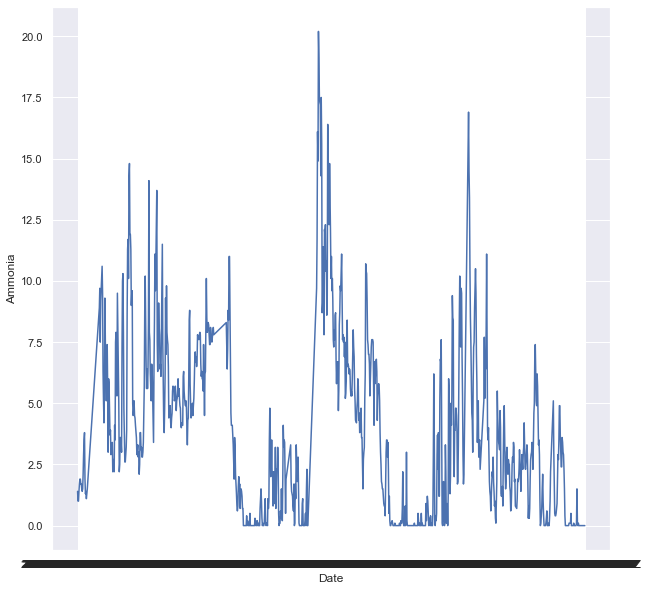

In [ ]:
tableGraph = table.loc[table.NameStation == "Moggio", :]
sns.lineplot(x="Date", y="Ammonia", data=tableGraph)

<AxesSubplot:xlabel='Date', ylabel='PM10'>

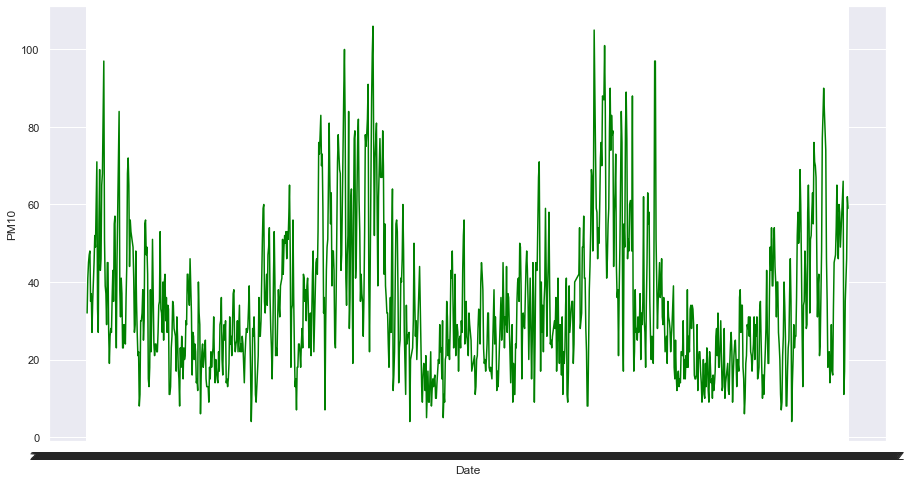

In [12]:

sns.lineplot(x="Date", y="PM10", data=tableGraph, color="green")

<AxesSubplot:xlabel='Date', ylabel='PM25'>

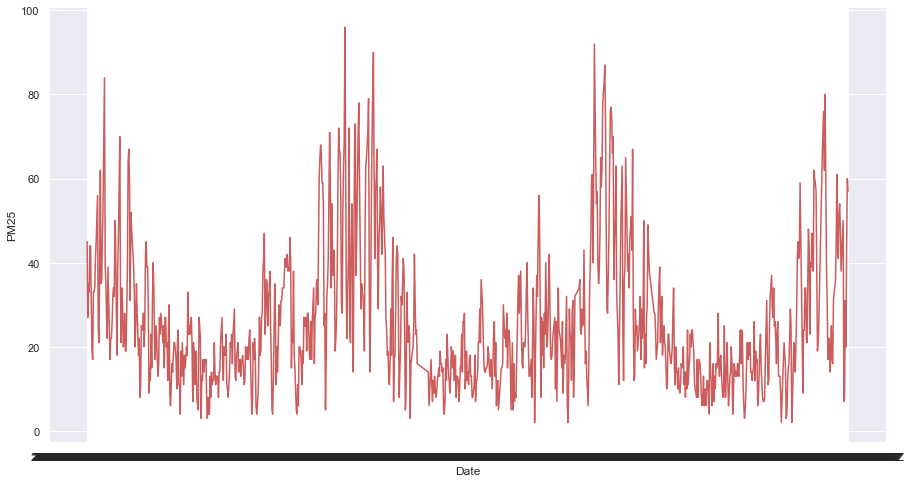

In [13]:
sns.lineplot(x="Date", y="PM25", data=tableGraph, color="indianred")


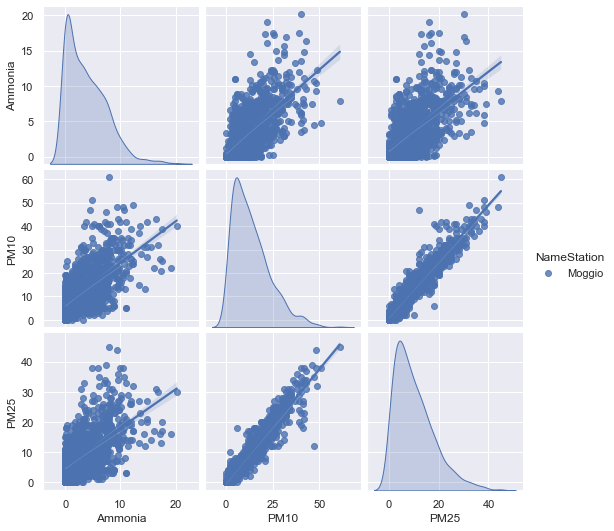

In [14]:
sns.pairplot(table.loc[table.NameStation == "Moggio", ["NameStation", "Ammonia",
             "PM10", "PM25"]], hue="NameStation", kind="reg")


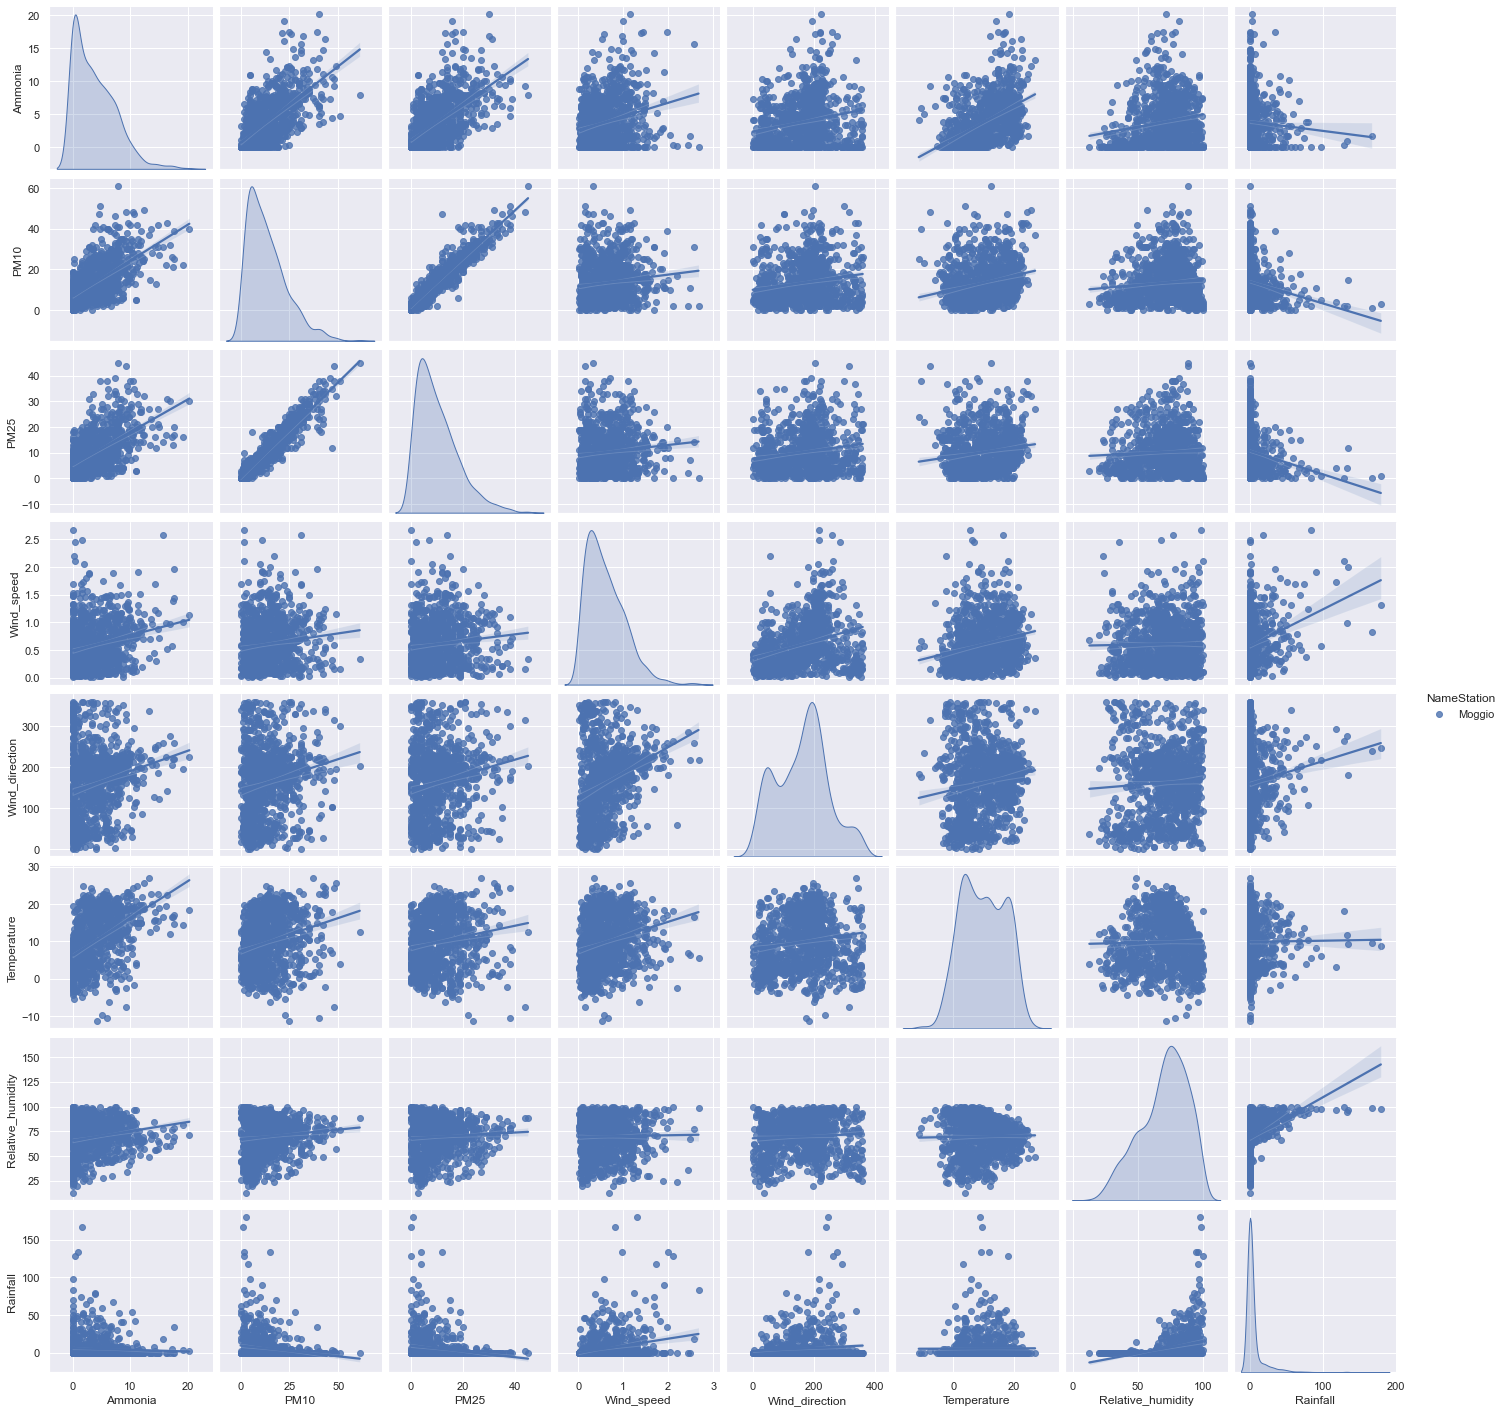

In [15]:
sns.pairplot(table.loc[table.NameStation == "Moggio", ['NameStation', 'Ammonia', 'PM10',
             'PM25', 'Wind_speed', 'Wind_direction', 'Temperature', 'Relative_humidity', 'Rainfall']], hue="NameStation", kind="reg")


In [16]:

# altair can only use up to 5000 rows
table2 = table.iloc[500:np.shape(table)[0], :]

table2 = table2.loc[table.NameStation == "Moggio", :]

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
    x='PM10',
    y='Ammonia',
    color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
    selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
    x='count()',
    y='NameStation',
    color='NameStation'
).transform_filter(interval)

points & histogram


alt.VConcatChart(...)

# Schivenoglia

# Plot of the time series


In [17]:
table= table.loc[table.NameStation == "Schivenoglia", :]
table.head()

Date  IDStation   NameStation  Ammonia  Arsenic  Benzene  \
2   2018-01-01T00:00:00Z        703  Schivenoglia      NaN      NaN      1.0   
5   2018-01-02T00:00:00Z        703  Schivenoglia      NaN      NaN      0.5   
8   2018-01-03T00:00:00Z        703  Schivenoglia     16.2      NaN      1.0   
11  2018-01-04T00:00:00Z        703  Schivenoglia     17.1      NaN      0.9   
14  2018-01-05T00:00:00Z        703  Schivenoglia     20.5      NaN      1.0   

    Benzo_a_pyrene  Cadmium        CO  Lead  ...  IDStation.2  \
2              NaN      NaN  1.159091   NaN  ...          671   
5              NaN      NaN  1.010526   NaN  ...          671   
8              NaN      NaN  1.141667   NaN  ...          671   
11             NaN      NaN  1.175000   NaN  ...          671   
14             NaN      NaN  1.208333   NaN  ...          671   

        NameStation.1  Wind_speed  Wind_direction  Temperature  \
2   Mantova Tridolino    1.540787           288.0     2.761806   
5   Mantova Tridolino    3.568997           276.0     5.345139   
8   Mantova Tridolino    0.455321           350.0     2.511111   
11  Mantova Tridolino    0.169860            86.0     5.018056   
14  Mantova Tridolino    0.349338           268.0     4.311806   

    Relative_humidity  Global_radiation  Wind_speed_max  Wind_direction_max  \
2           99.475694         14.163194        3.524306                 NaN   
5           81.608333         77.325694        5.759722                 NaN   
8           97.288194         46.329167        2.320139                 NaN   
11          99.057639         76.713194        3.668056                 NaN   
14          98.643056         45.736111        1.358333                 NaN   

    Rainfall  
2        5.8  
5        0.0  
8        0.0  
11       0.0  
14       0.0  

[5 rows x 31 columns]

<AxesSubplot:xlabel='Date', ylabel='Ammonia'>

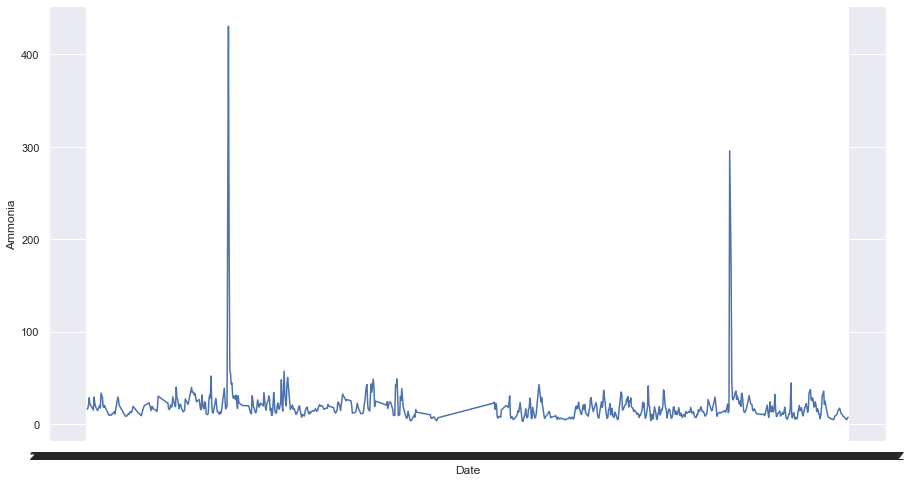

In [18]:
tableGraph = table.loc[table.NameStation == "Schivenoglia", :]
sns.lineplot(x="Date", y="Ammonia", data=tableGraph)

/opt/homebrew/Caskroom/miniforge/base/envs/vincienv/lib/python3.9/site-packages/seaborn/relational.py:436: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout, = ax.plot([], [], **kws)
/opt/homebrew/Caskroom/miniforge/base/envs/vincienv/lib/python3.9/site-packages/seaborn/relational.py:514: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot([], [], **kws)
/opt/homebrew/Caskroom/miniforge/base/envs/vincienv/lib/python3.9/site-packages/seaborn/relational.py:529: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  line, = ax.plot(x, y, **kws)


<AxesSubplot:xlabel='Date', ylabel='PM10'>

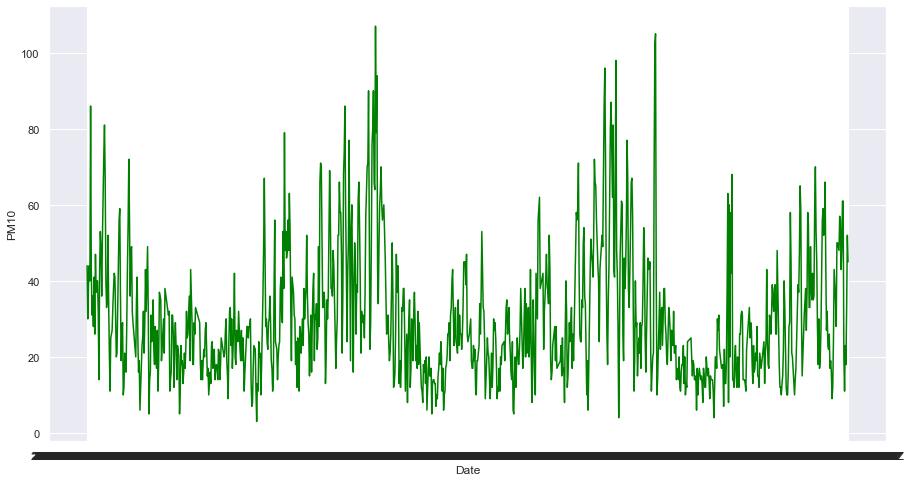

In [19]:
sns.lineplot(x="Date", y="PM10", data=tableGraph, Color="green")

<AxesSubplot:xlabel='Date', ylabel='PM25'>

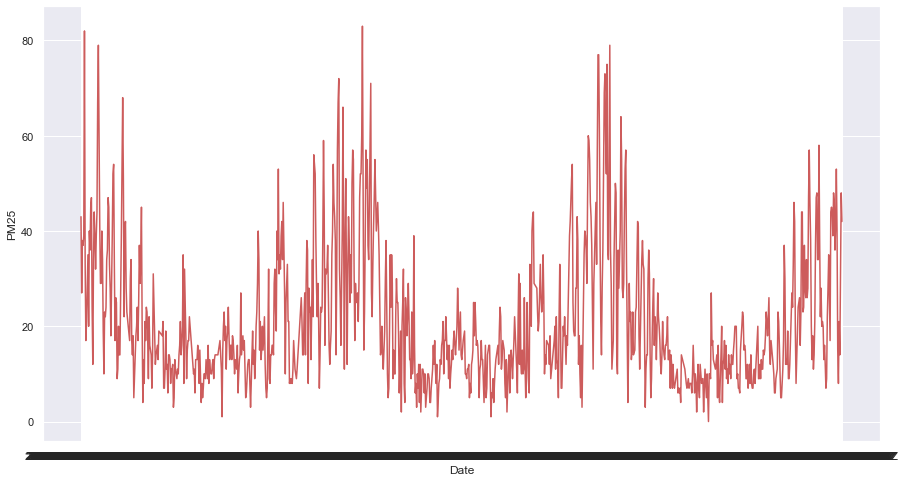

In [20]:
sns.lineplot(x="Date", y="PM25", data=tableGraph, color="indianred")


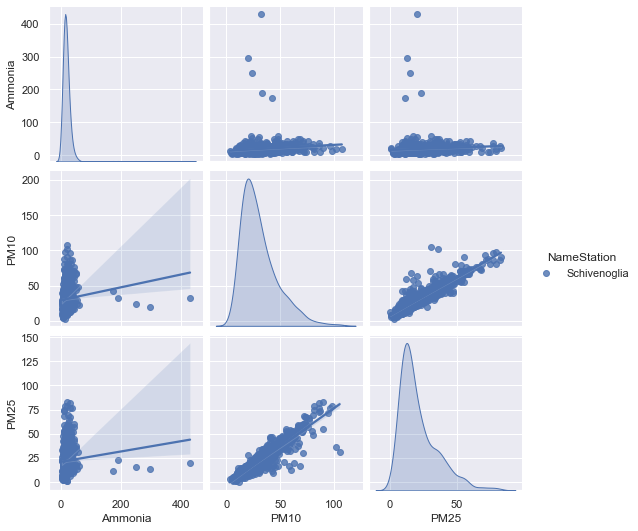

In [21]:
sns.pairplot(table.loc[table.NameStation == "Schivenoglia", ["NameStation", "Ammonia",
             "PM10", "PM25"]], hue="NameStation", kind="reg")


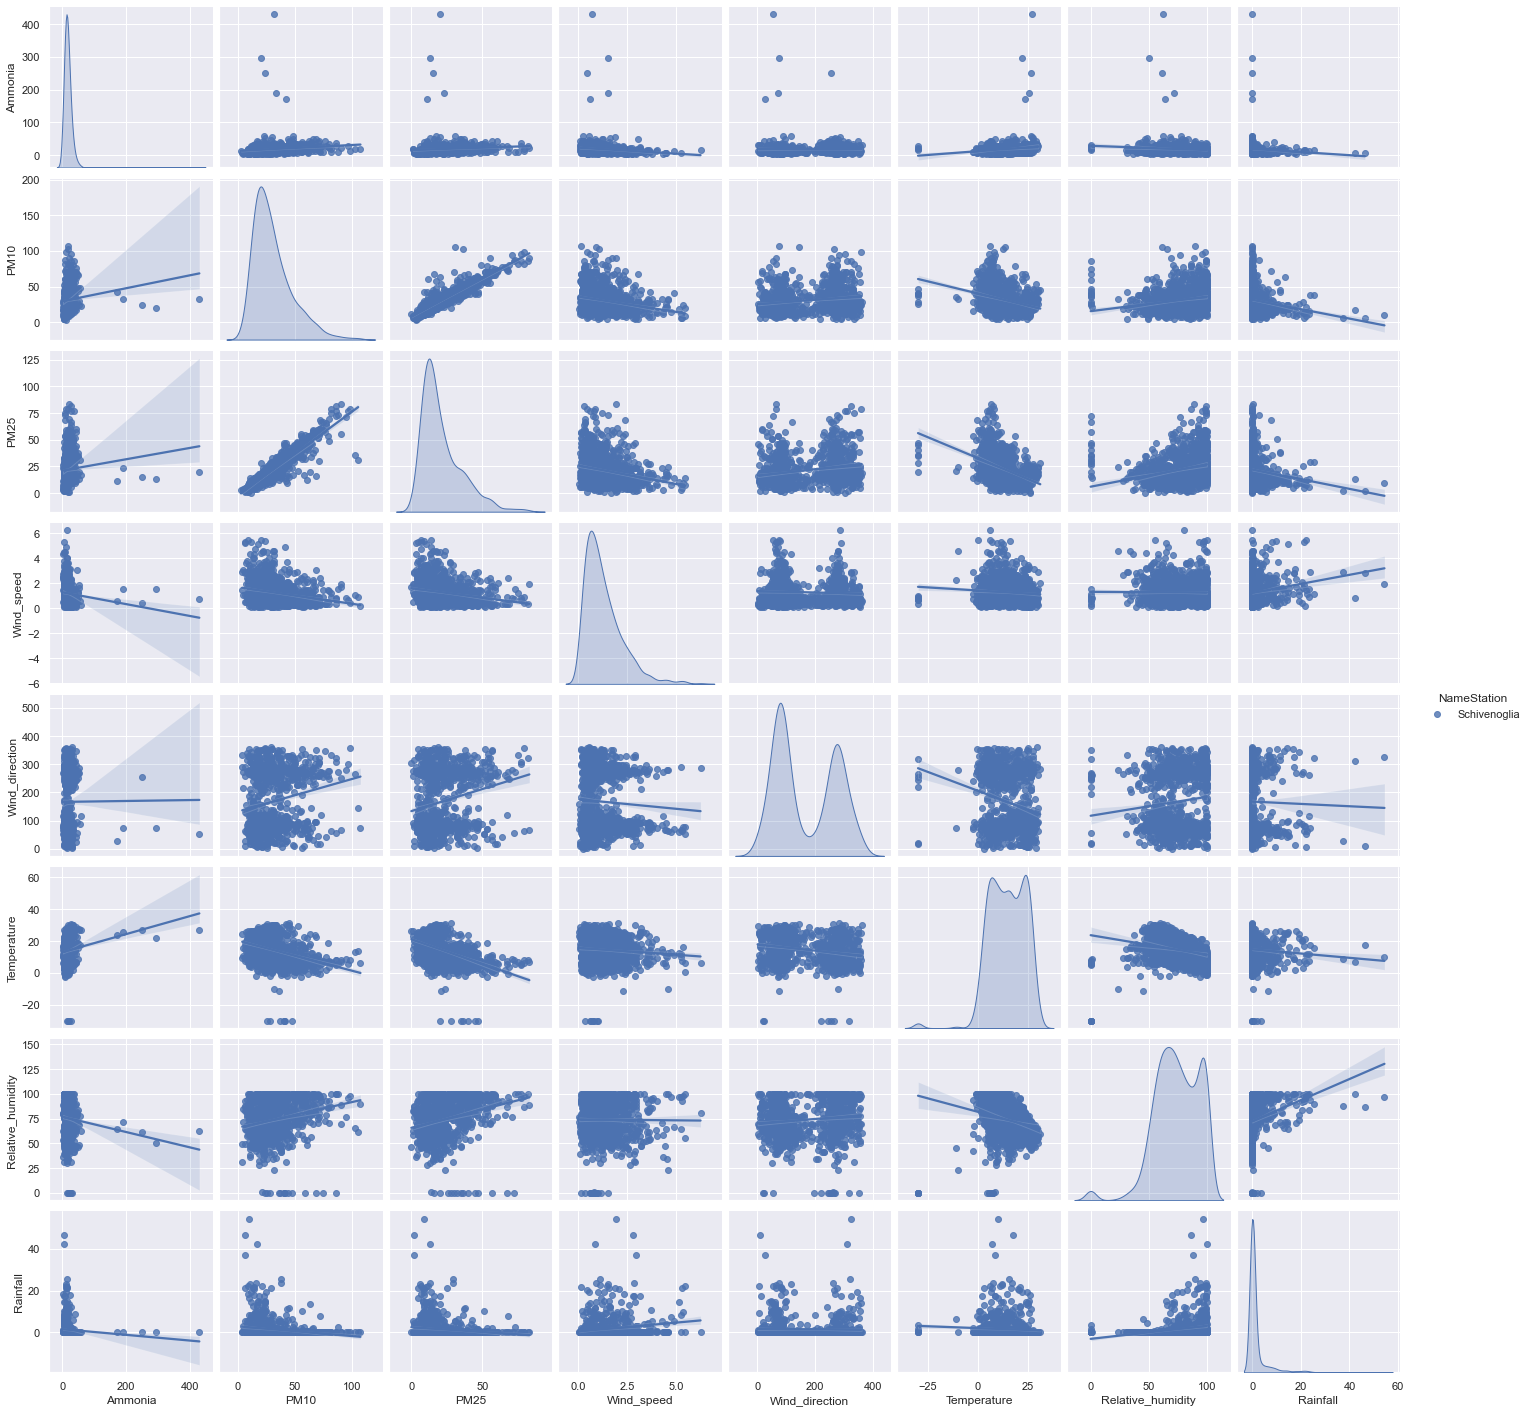

In [22]:
sns.pairplot(table.loc[table.NameStation == "Schivenoglia", ['NameStation', 'Ammonia', 'PM10',
             'PM25', 'Wind_speed', 'Wind_direction', 'Temperature', 'Relative_humidity', 'Rainfall']], hue="NameStation", kind="reg")


In [23]:

# altair can only use up to 5000 rows
table2 = table.iloc[500:np.shape(table)[0], :]

table2 = table2.loc[table.NameStation == "Schivenoglia", :]

interval = alt.selection_interval()

points = alt.Chart(table2).mark_point().encode(
    x='PM10',
    y='Ammonia',
    color=alt.condition(interval, 'NameStation', alt.value('lightgray'))
).properties(
    selection=interval
)

histogram = alt.Chart(table2).mark_bar().encode(
    x='count()',
    y='NameStation',
    color='NameStation'
).transform_filter(interval)

points & histogram


alt.VConcatChart(...)